# K-Means Clustering Notebook

## About

With this project I am to use the K-Means clustering algorithm on the country dataset. The dataset attributes include columns such as child mortality, net income per person  life expectancy and other factors that determine the overall status of a country. After running the dataset through a model, we will determine which countries would make better candidates for extra aid. 

## Setup

### Import libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import plotly.express as px

In [2]:
data = pd.read_csv('../datasets/country_data/Country-data.csv')

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.shape

(167, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


We have one object type that we will have to deal with. Since this is the country, we can drop this when we train our model(s)

### Graph Data

In [6]:
import plotly.express as px
columns=['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

colors = ["rgb(255, 51, 51)", "rgb(210, 231, 154)", "rgb(94, 179, 39)", "rgb(67, 136, 33)", "rgb(33, 74, 12)"]

for i in columns:
  fig = px.choropleth(data,
                    locationmode='country names',
                    locations='country',
                    color= i,
                    title='Show the differences in Countries by '+ i,
                    color_continuous_scale=colors
                   )

  fig.show()

### Exploratory Data Analysis

In [7]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [8]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [10]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [11]:
categorical_mask = (data.dtypes == 'object')
categorical_columns = data.columns[categorical_mask].tolist()
categorical_columns

['country']

In [12]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [13]:
print("Categorical Columns: ", *categorical_columns)
print("Numerical Columns : ", *numerical_columns)

Categorical Columns:  country
Numerical Columns :  child_mort exports health imports income inflation life_expec total_fer gdpp


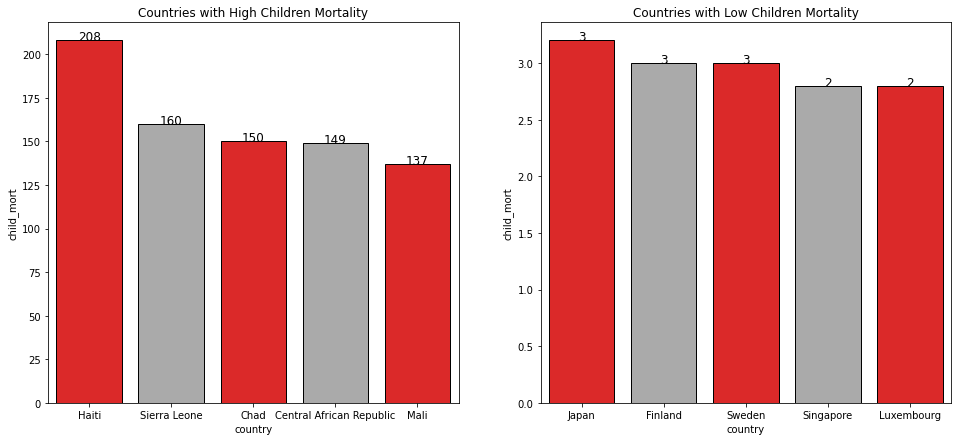

In [17]:
colors = ['#f80c0c','#AAAAAA']
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Children Mortality')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Children Mortality')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

Copied this type of graphs from another notebook. Its interesting.

**What does this show?**

The first graph shows the countries with high child mortality. Its not a coincidence that these countries also have low economic output. You can see the inverse of this in the second graph

# Feature Correlation

Lets do a feature correlation matrix because its cool and sounds like a smart thing to do. 

<AxesSubplot:>

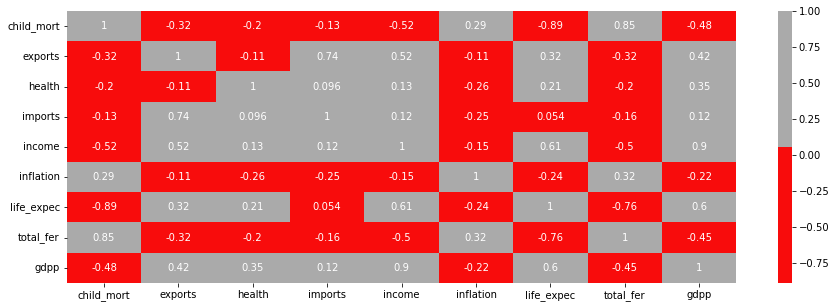

In [18]:
fig, ax = plt.subplots(nrows= 1, ncols= 1, figsize = (15, 5))
corr = data.corr()
sns.heatmap(corr, cmap = colors,annot = True,cbar = 'True')

**What are we seeing here?**

We are seeing how features are correlated with other features. For example, as exports increases, so does gdp, income and imports.

# Feature Scaling

**Why do we scale data?**

We scale the data because machine learning algorithms take input and processes them as just numbers, without context of the meaning of those numbers. Simply, it does not understand the meaning of that value. Additionally, the data can contain features in different units, ranges, and variance. These differences in features can cause issues for when it comes time to train our model. By scaling the data, the model is able to interpret these features on the same scale.

In [19]:
data = data.drop(['country'], axis=1)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [20]:
sc = StandardScaler()
scaled_data = sc.fit_transform(data)

In [21]:
scaled_data

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [22]:
# transforming into dataframe
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## K-Means Clustering

In [23]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters)

In [24]:
cluster_labels = km.fit_predict(scaled_data)

c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [25]:
scaled_df['cluster'] = cluster_labels
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1


## Elbow Method

c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have

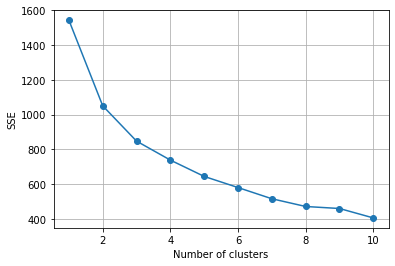

In [26]:

sse = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(scaled_df)
    sse.append(km.inertia_)

# Plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.grid()
plt.show()

It would appear based on this elbow method plot that 3 would be the optimal amount of clusters.

In [27]:
num_clusters = 3
km = KMeans(n_clusters=num_clusters, random_state = 111)


c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [28]:
#count number of records in every cluster
pd.Series(km.labels_).value_counts()

2    84
0    47
1    36
dtype: int64

In [29]:
# Add labels to original dataset
data['cluster'] = km.labels_
data.head(20)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,2
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2
5,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2
6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
9,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,2
